In [1]:
import pandas as pd
import numpy as np
data=pd.read_csv("/Users/gunnvantsaini/Data/Work/Python Trainings/PythonForModellers/Data/dm.csv")

In [2]:
data.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247
1,Middle,Male,Rent,Single,Close,63600,0,High,6,1318,127
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479
3,Middle,Male,Own,Married,Close,85600,1,High,18,2436,475
4,Middle,Female,Own,Single,Close,68400,0,High,12,1304,151


In [3]:
### Data Exploration and do some sanity checks
## Sanity Checks===> I have valid data from a business pov
## Explore data =====> Which variables can be included in the modelling task
## Which predictor is related to the target variable+Missing values, we do something about them

In [4]:
### !Rules, general guidelines
data.describe()

,Salary,Children,Catalogs,AmountSpent,Cust_Id
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,56103.900000,0.93400,14.682000,1216.770000,643.930000
std,30616.314826,1.05107,6.622895,961.068613,369.047166
min,10100.000000,0.00000,6.000000,38.000000,12.000000
25%,29975.000000,0.00000,6.000000,488.250000,316.750000
50%,53700.000000,1.00000,12.000000,962.000000,636.000000
75%,77025.000000,2.00000,18.000000,1688.500000,955.500000
max,168800.000000,3.00000,24.000000,6217.000000,1297.000000


In [5]:
## Exploration: Is to see how the predictors are related to Target
data.groupby('Age').agg({'AmountSpent':'mean'})

,AmountSpent
Age,
Middle,1501.690945
Old,1432.126829
Young,558.623693


In [19]:
import matplotlib
matplotlib.__version__

'3.1.0'

In [6]:
## Visual group by: Boxplot
import matplotlib.pyplot as plt
%matplotlib inline

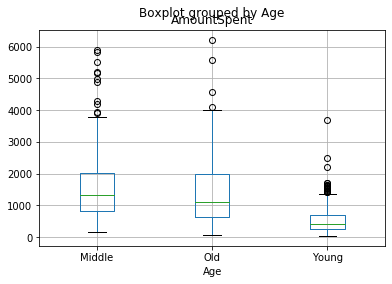

In [7]:
data.boxplot(by="Age",column="AmountSpent")

In [10]:
data["Age_N"]=data['Age'].map(lambda x:"Old-Middle" if x !="Young" else "Young")

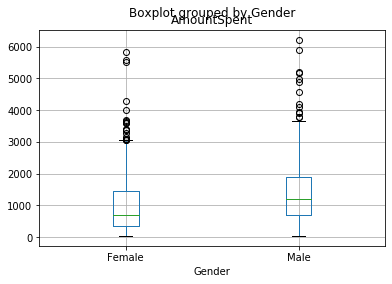

In [11]:
data.boxplot(by="Gender",column="AmountSpent")

In [13]:
data.groupby("Gender").agg({'AmountSpent':'mean'})

,AmountSpent
Gender,
Female,1025.339921
Male,1412.850202


In [17]:
data.groupby("OwnHome").agg({'AmountSpent':['mean','min','max']})

AmountSpent          
                mean min   max
OwnHome                       
Own      1543.135659  65  6217
Rent      868.826446  38  5830

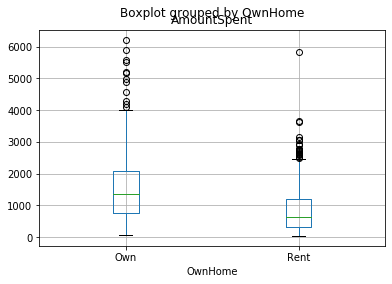

In [15]:
data.boxplot(by="OwnHome",column="AmountSpent")

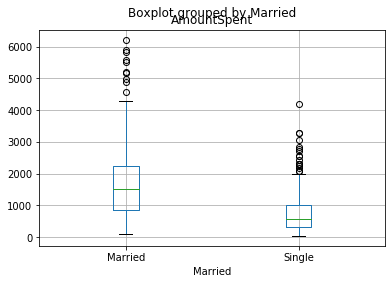

In [18]:
data.boxplot(by="Married",column="AmountSpent")

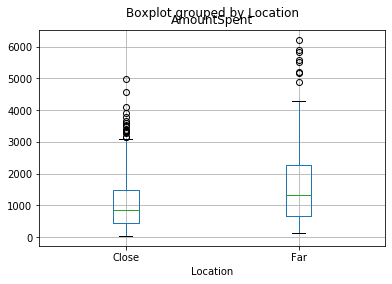

In [20]:
data.boxplot(by="Location",column="AmountSpent")

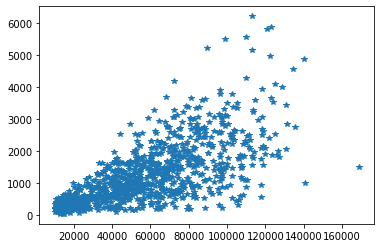

In [21]:
plt.plot(data['Salary'],data['AmountSpent'],"*")

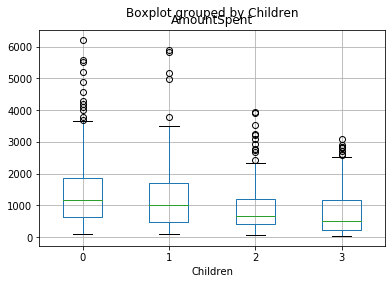

In [23]:
data.boxplot(by="Children",column="AmountSpent")

In [24]:
data['Children_01']=data['Children'].map(lambda x:1 if x<=1 else 0)
data['Children_23']=data["Children"].map(lambda x:1 if x>=2 else 0)

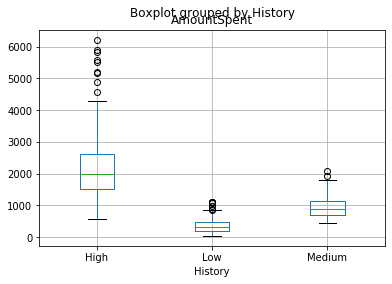

In [25]:
data.boxplot(by="History",column="AmountSpent")

In [26]:
data['History'].isnull().sum()

303

In [27]:
data['History']=data['History'].fillna("NewCust")

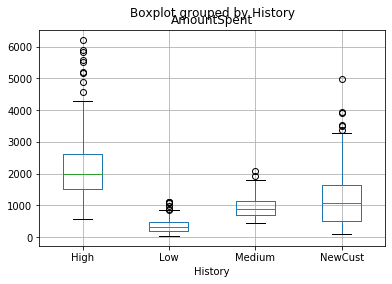

In [28]:
data.boxplot(by="History",column="AmountSpent")

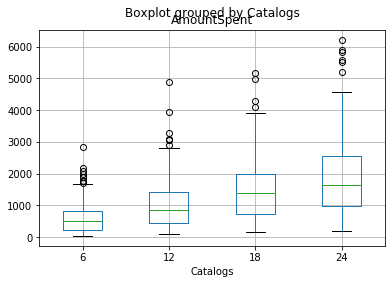

In [29]:
data.boxplot(by="Catalogs",column="AmountSpent")

In [30]:
### Now we can start to model
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id', 'Age_N', 'Children_01',
       'Children_23'],
      dtype='object')

In [74]:
## We segregate our data into two parts, one part is used to build a model, the other is used
# to test your model
train=data.sample(frac=0.7,random_state=200) ## random sample

In [75]:
test=data.drop(train.index)

In [76]:
train.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Age_N,Children_01,Children_23
674,Middle,Female,Own,Married,Close,85500,2,Medium,18,895,605,Old-Middle,0,1
233,Old,Female,Own,Married,Close,74400,0,High,18,2479,704,Old-Middle,1,0
739,Middle,Male,Rent,Single,Close,45900,0,Medium,12,716,293,Old-Middle,1,0
865,Middle,Male,Own,Married,Close,96100,0,High,6,1588,744,Old-Middle,1,0
523,Old,Female,Rent,Married,Far,72200,0,High,24,3069,1198,Old-Middle,1,0


In [77]:
test.head()

,Age,Gender,OwnHome,Married,Location,Salary,Children,History,Catalogs,AmountSpent,Cust_Id,Age_N,Children_01,Children_23
0,Old,Female,Own,Single,Far,47500,0,High,6,755,247,Old-Middle,1,0
2,Young,Female,Rent,Single,Close,13500,0,Low,18,296,479,Young,1,0
6,Middle,Female,Rent,Single,Close,48100,0,Medium,12,782,804,Old-Middle,1,0
7,Middle,Male,Own,Single,Close,68400,0,High,18,1155,790,Old-Middle,1,0
10,Young,Male,Rent,Married,Close,43700,1,NewCust,12,927,157,Young,1,0


In [78]:
### Start to model: Include all the relevant variables in my model
data.columns

Index(['Age', 'Gender', 'OwnHome', 'Married', 'Location', 'Salary', 'Children',
       'History', 'Catalogs', 'AmountSpent', 'Cust_Id', 'Age_N', 'Children_01',
       'Children_23'],
      dtype='object')

In [79]:
import statsmodels.formula.api as smf

In [83]:
mod=smf.ols("AmountSpent~Age_N+Gender+OwnHome+Married+Location+Salary+History+Catalogs+Children_01",
        data=train).fit()

In [84]:
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     187.8
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          9.16e-199
Time:                        11:14:30   Log-Likelihood:                -5324.6
No. Observations:                 700   AIC:                         1.067e+04
Df Residuals:                     688   BIC:                         1.073e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           -515.8062    141

In [87]:
data['History'].head()

0    High
1    High
2     Low
3    High
4    High
Name: History, dtype: object

In [88]:
train['History_Low']=train['History'].map(lambda x: 1 if x=="Low" else 0)
test['History_Low']=test['History'].map(lambda x: 1 if x=="Low" else 0)
train['History_M']=train['History'].map(lambda x: 1 if x=="Medium" else 0)
test['History_M']=test['History'].map(lambda x: 1 if x=="Medium" else 0)

In [89]:
formula="AmountSpent~Location+Salary+Catalogs+History_Low+History_M"
mods=smf.ols(formula,data=train).fit()

In [90]:
print(mods.summary())

                            OLS Regression Results                            
Dep. Variable:            AmountSpent   R-squared:                       0.720
Model:                            OLS   Adj. R-squared:                  0.718
Method:                 Least Squares   F-statistic:                     356.3
Date:                Wed, 10 Jul 2019   Prob (F-statistic):          6.77e-189
Time:                        11:18:46   Log-Likelihood:                -5364.9
No. Observations:                 700   AIC:                         1.074e+04
Df Residuals:                     694   BIC:                         1.077e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        -278.8466     72.263     

In [91]:
## Do some final checks
# See how my errors look like
# If by mistake I have inlcuded variables that give me the same information
fitted=mods.fittedvalues
resid=mods.resid

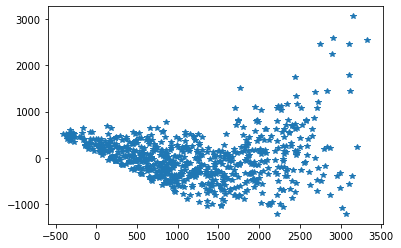

In [92]:
plt.plot(fitted,resid,"*")

In [93]:
formula="np.log(AmountSpent)~Location+Salary+Catalogs+History_Low+History_M"
mod3=smf.ols(formula,data=train).fit()

In [94]:
print(mod3.summary())

                             OLS Regression Results                            
Dep. Variable:     np.log(AmountSpent)   R-squared:                       0.804
Model:                             OLS   Adj. R-squared:                  0.803
Method:                  Least Squares   F-statistic:                     569.7
Date:                 Wed, 10 Jul 2019   Prob (F-statistic):          7.88e-243
Time:                         11:28:34   Log-Likelihood:                -328.73
No. Observations:                  700   AIC:                             669.5
Df Residuals:                      694   BIC:                             696.8
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           5.5640      

In [95]:
fitted=mod3.fittedvalues
resid=mod3.resid

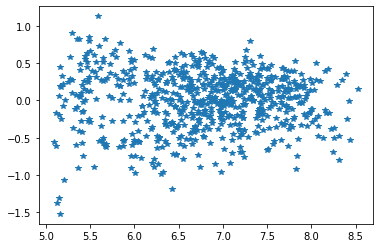

In [97]:
plt.plot(fitted,resid,"*")

In [98]:
## If the columns included in your model are giving your same information, predictors are related to each other
# For each variable I compute VIF (Variance Infaltion Factor) (Correlation Coefficient)
# VIF>5, then it means the variable is related to the others, then I need to remove it
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

In [99]:
y,X=dmatrices(formula,train,return_type="dataframe")

In [104]:
y.head()

,np.log(AmountSpent)
674,6.796824
233,7.815611
739,6.573680
865,7.370231
523,8.029107


In [100]:
X.head()

,Intercept,Location[T.Far],Salary,Catalogs,History_Low,History_M
674,1.0,0.0,85500.0,18.0,0.0,1.0
233,1.0,0.0,74400.0,18.0,0.0,0.0
739,1.0,0.0,45900.0,12.0,0.0,1.0
865,1.0,0.0,96100.0,6.0,0.0,0.0
523,1.0,1.0,72200.0,24.0,0.0,0.0


In [102]:
variance_inflation_factor(X.values,0)

13.637016132070277

In [105]:
variance_inflation_factor(X.values,1)

1.049167042504158

In [106]:
variance_inflation_factor(X.values,2)

1.2938583635964613

In [107]:
variance_inflation_factor(X.values,3)

1.0529766496268975

In [108]:
variance_inflation_factor(X.values,4)

1.4594737885629605

In [109]:
variance_inflation_factor(X.values,5)

1.163433747567432

In [112]:
np.exp(mod3.predict(test)).head()

0      847.985101
2      274.439325
6      677.032738
7     1408.577979
10     781.578178
dtype: float64